In [2]:
import cv2
from keras.layers import *
from keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
import keras.backend as backend
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from os import listdir
from os.path import isfile, join
path = '/content/drive/My Drive/course_materials_2020/Practical DL workshop - lecture 11/JPEGImages/'
files=[f for f in listdir(path) if isfile(join(path, f))]

In [0]:
images=list()
i =0
for file in files:
  img=cv2.imread(path +'/'+file)
  images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Reshape the images

In [0]:
images72=list()
images144=list()
images288=list()
for img in images:
  images72.append(cv2.resize(img,(72,72)))
  images144.append(cv2.resize(img,(144,144)))
  images288.append(cv2.resize(img,(288,288)))
  

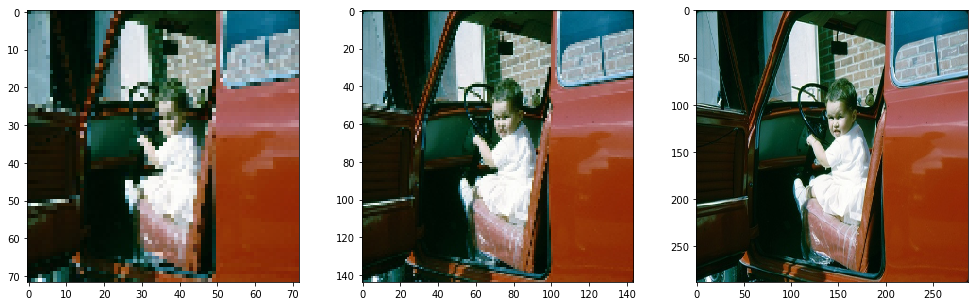

In [30]:
fig, ax= plt.subplots(1,3,figsize=(17,5))
ax[0].imshow(images72[4])
ax[1].imshow(images144[4])
ax[2].imshow(images288[4])

leaky relu function

In [0]:
class LeakyRELU(LeakyReLU):
  def __init__(self,**kwargs):
    self.__name__="LeakyRELU"
    super(LeakyRELU,self).__init__(**kwargs)

# First model - for 144 pixels

In [27]:
from keras.models import Sequential
model = Sequential()
input_shape=images72[0].shape
inp=Input(input_shape)
x=Conv2D(filters=64, kernel_size=(3,3),padding='same',input_shape=input_shape)(inp)
x=Activation(LeakyRELU(alpha=0.2))(x)
x=Conv2D(filters=3, kernel_size=(3,3),padding='same')(x)
x=Activation(LeakyRELU(alpha=0.2))(x)
out=UpSampling2D()(x)
model=Model(inp,out)
model.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyRELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [33]:
len(images72)

5021

In [0]:
import numpy as np
small_train=np.array(images72[:4000])/255
small_valid=np.array(images72[4000:4500])/255
small_test=np.array(images72[4500:])/255
mid_train=np.array(images144[:4000])/255
mid_valid=np.array(images144[4000:4500])/255
mid_test=np.array(images144[4500:])/255
big_train=np.array(images288[:4000])/255
big_valid=np.array(images288[4000:4500])/255
big_test=np.array(images288[4500:])/255

In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 72, 72, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 3)         1731      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 3)         0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 144, 144, 3)       0         
Total params: 3,523
Trainable params: 3,523
Non-trainable params: 0
_________________________________________________________

In [36]:
model.fit(small_train,mid_train,validation_data=(small_valid,mid_valid),epochs=10)




Train on 4000 samples, validate on 500 samples
Epoch 1/10





4000/4000 [==============================] - 16s 4ms/step - loss: 0.0183 - val_loss: 0.0100
Epoch 2/10
4000/4000 [==============================] - 2s 562us/step - loss: 0.0088 - val_loss: 0.0084
Epoch 3/10
4000/4000 [==============================] - 2s 559us/step - loss: 0.0079 - val_loss: 0.0079
Epoch 4/10
4000/4000 [==============================] - 2s 553us/step - loss: 0.0075 - val_loss: 0.0077
Epoch 5/10
4000/4000 [==============================] - 2s 554us/step - loss: 0.0074 - val_loss: 0.0076
Epoch 6/10
4000/4000 [==============================] - 2s 553us/step - loss: 0.0074 - val_loss: 0.0076
Epoch 7/10
4000/4000 [==============================] - 2s 542us/step - loss: 0.0074 - val_loss: 0.0076
Epoch 8/10
4000/4000 [==============================] - 2s 545us/step - loss: 0.0073 - val_loss: 0.0075
Epoch 9/10
4000/4000 [==============================] - 2s 545us/step - loss: 0.0073 - val_loss: 0.0075
Epoch 10/1

In [0]:
pred72=model.predict(small_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


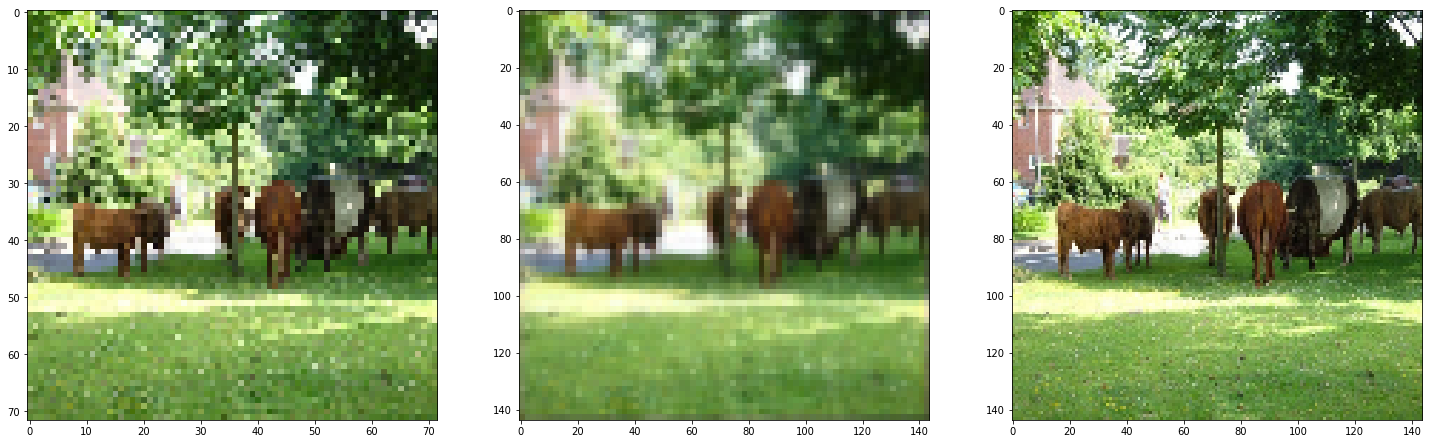

In [38]:
fig, ax= plt.subplots(1,3,figsize=(25,10))
ax[0].imshow(small_test[10])
ax[1].imshow(pred72[10])
ax[2].imshow(mid_test[10])


output plot. left is the input, the middle is the model output and the right is the 144 pixels image

# First model - for 144 and 288 pixels

In [39]:
model = Sequential()
input_shape=images72[0].shape
print(input_shape)
inp=Input(input_shape)
x=Conv2D(filters=64, kernel_size=(3,3),padding='same',input_shape=input_shape)(inp)
x=Activation(LeakyRELU(alpha=0.2))(x)
x=Conv2D(filters=64, kernel_size=(3,3),padding='same')(x)
x=Activation(LeakyRELU(alpha=0.2))(x)
x=UpSampling2D()(x)
out1=Conv2D(kernel_size=(1,1),filters=3)(x)
out1=Activation(LeakyRELU(alpha=0.2))(out1)
x2=UpSampling2D()(x)
out2=Conv2D(kernel_size=(1,1),filters=3)(x2)
out2=Activation(LeakyRELU(alpha=0.2))(out2)
model=Model(inp,[out1,out2])
model.compile(optimizer='adam',loss='mse')

(72, 72, 3)


/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyRELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [40]:
model.fit(small_train,[mid_train,big_train],validation_data=(small_valid,[mid_valid,big_valid]),epochs=10)

Train on 4000 samples, validate on 500 samples
Epoch 1/10
4000/4000 [==============================] - 14s 3ms/step - loss: 0.0378 - activation_5_loss: 0.0187 - activation_6_loss: 0.0191 - val_loss: 0.0166 - val_activation_5_loss: 0.0084 - val_activation_6_loss: 0.0082
Epoch 2/10
4000/4000 [==============================] - 13s 3ms/step - loss: 0.0153 - activation_5_loss: 0.0077 - activation_6_loss: 0.0076 - val_loss: 0.0154 - val_activation_5_loss: 0.0078 - val_activation_6_loss: 0.0076
Epoch 3/10
4000/4000 [==============================] - 13s 3ms/step - loss: 0.0148 - activation_5_loss: 0.0074 - activation_6_loss: 0.0074 - val_loss: 0.0152 - val_activation_5_loss: 0.0076 - val_activation_6_loss: 0.0075
Epoch 4/10
4000/4000 [==============================] - 13s 3ms/step - loss: 0.0147 - activation_5_loss: 0.0074 - activation_6_loss: 0.0073 - val_loss: 0.0151 - val_activation_5_loss: 0.0076 - val_activation_6_loss: 0.0075
Epoch 5/10
4000/4000 [==============================] - 13s 3

In [0]:
pred1,pred2=model.predict(small_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


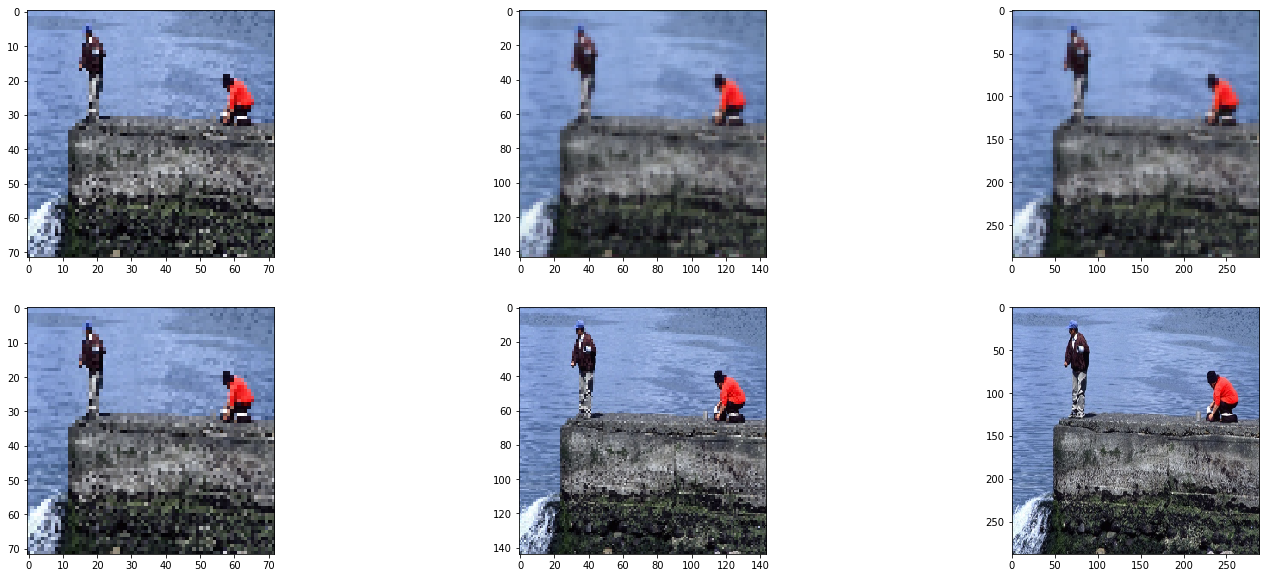

In [42]:
fig, ax= plt.subplots(2,3,figsize=(25,10))
ax[0][0].imshow(small_test[5])
ax[0][1].imshow(pred1[5])
ax[0][2].imshow(pred2[5])
ax[1][0].imshow(images72[4505])
ax[1][1].imshow(images144[4505])
ax[1][2].imshow(images288[4505])

# Res blocks

In [0]:
def res_block():
  inp=Input(shape=(None,None,64))
  x=Conv2D(filters=64,kernel_size=(3,3),padding='same')(inp)
  x=Activation(LeakyRELU(alpha=0.2))(x)
  x=Conv2D(filters=64,kernel_size=(3,3),padding='same')(x)
  x=Activation(LeakyRELU(alpha=0.2))(x)
  x=add([x,inp])
  x=Activation(LeakyRELU(alpha=0.2))(x)
  return Model(inp,x)

# Second model 

In [29]:
model = Sequential()
input_shape=images72[0].shape
print(input_shape)
inp=Input(input_shape)
x_new=Conv2D(filters=64,kernel_size=(3,3),padding='same',input_shape=input_shape)(inp)
x_new=Activation(LeakyRELU(alpha=0.2))(x_new)
for i in range(1,5):
  x_new=res_block()(x_new)
x_new=UpSampling2D()(x_new)
out1=Conv2D(kernel_size=(1,1),filters=3)(x_new)
out1=Activation(LeakyRELU(alpha=0.2))(out1)
x_new=res_block()(x_new)
x_new=res_block()(x_new)
x2=UpSampling2D()(x_new)
out2=Conv2D(kernel_size=(1,1),filters=3,activation='relu')(x2)
out2=Activation(LeakyRELU(alpha=0.2))(out2)

model=Model(inp,[out1,out2])
model.compile(optimizer='adam',loss='mse')

(72, 72, 3)


/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyRELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [45]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 72, 72, 3)    0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 72, 72, 64)   1792        input_3[0][0]                    
__________________________________________________________________________________________________
activation_7 (Activation)       (None, 72, 72, 64)   0           conv2d_8[0][0]                   
__________________________________________________________________________________________________
model_3 (Model)                 multiple             73856       activation_7[0][0]               
____________________________________________________________________________________________

In [30]:
model.fit(small_train,[mid_train,big_train],validation_data=(small_valid,[mid_valid,big_valid]),epochs=10)




Train on 4000 samples, validate on 500 samples
Epoch 1/10





4000/4000 [==============================] - 47s 12ms/step - loss: 0.1257 - activation_79_loss: 0.0183 - activation_86_loss: 0.1075 - val_loss: 0.0893 - val_activation_79_loss: 0.0082 - val_activation_86_loss: 0.0812
Epoch 2/10
4000/4000 [==============================] - 31s 8ms/step - loss: 0.0901 - activation_79_loss: 0.0077 - activation_86_loss: 0.0824 - val_loss: 0.0887 - val_activation_79_loss: 0.0078 - val_activation_86_loss: 0.0809
Epoch 3/10
4000/4000 [==============================] - 31s 8ms/step - loss: 0.0898 - activation_79_loss: 0.0075 - activation_86_loss: 0.0823 - val_loss: 0.0885 - val_activation_79_loss: 0.0077 - val_activation_86_loss: 0.0808
Epoch 4/10
4000/4000 [==============================] - 31s 8ms/step - loss: 0.0896 - activation_79_loss: 0.0074 - activation_86_loss: 0.0822 - val_loss: 0.0883 - val_activation_79_loss: 0.0076 - val_activation_86_loss: 0.0807
Epoch 5/10
4000/4000 [==============

In [0]:
pred1,pred2=model.predict(small_test)

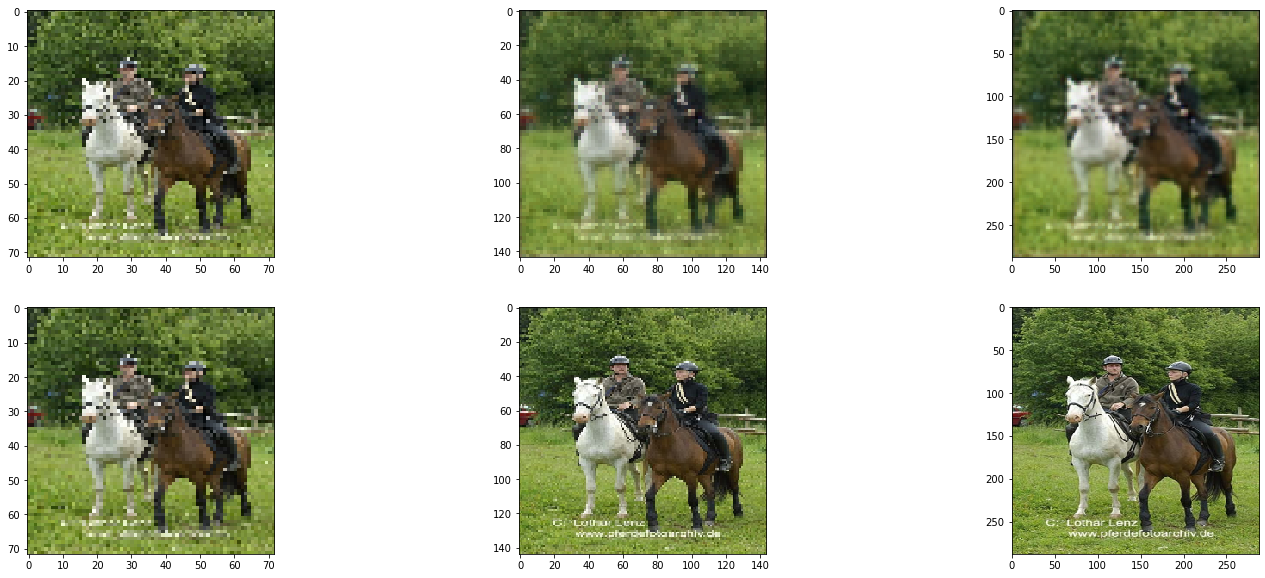

In [32]:
fig, ax= plt.subplots(2,3,figsize=(25,10))
ax[0][0].imshow(small_test[7])
ax[0][1].imshow(pred1[7])
ax[0][2].imshow(pred2[7])
ax[1][0].imshow(images72[4507])
ax[1][1].imshow(images144[4507])
ax[1][2].imshow(images288[4507])

# U-RES block based model

In [33]:
model = Sequential()
input_shape=images72[0].shape
inp=Input(input_shape)
x_new=Conv2D(filters=64,kernel_size=(3,3),padding='same',input_shape=input_shape)(inp)
x_new=Activation(LeakyRELU(alpha=0.2))(x_new)
firstConn=res_block()(x_new)
x_new=MaxPooling2D()(firstConn)
secConn=res_block()(x_new)
x_new=MaxPooling2D()(secConn)
thirdConn=UpSampling2D()(x_new)
x_new=add([secConn,thirdConn])
x_new=res_block()(x_new)
fourthConn=UpSampling2D()(x_new)
x_new=add([firstConn,fourthConn])
x_new=res_block()(x_new)
x_new=UpSampling2D()(x_new)
x_new=Conv2D(kernel_size=(1,1),filters=3)(x_new)
x_new=Activation(LeakyRELU(alpha=0.2))(x_new)
model=Model(inp,x_new)
model.summary()
model.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyRELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Model: "model_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 72, 72, 3)    0                                            
__________________________________________________________________________________________________
conv2d_74 (Conv2D)              (None, 72, 72, 64)   1792        input_23[0][0]                   
__________________________________________________________________________________________________
activation_87 (Activation)      (None, 72, 72, 64)   0           conv2d_74[0][0]                  
__________________________________________________________________________________________________
model_23 (Model)                multiple             73856       activation_87[0][0]              
___________________________________________________________________________________________

In [34]:
model.fit(small_train,mid_train,validation_data=(small_valid,mid_valid),epochs=10)

Train on 4000 samples, validate on 500 samples
Epoch 1/10
4000/4000 [==============================] - 9s 2ms/step - loss: 0.0385 - val_loss: 0.0101
Epoch 2/10
4000/4000 [==============================] - 8s 2ms/step - loss: 0.0090 - val_loss: 0.0088
Epoch 3/10
4000/4000 [==============================] - 8s 2ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 4/10
4000/4000 [==============================] - 8s 2ms/step - loss: 0.0081 - val_loss: 0.0082
Epoch 5/10
4000/4000 [==============================] - 8s 2ms/step - loss: 0.0079 - val_loss: 0.0081
Epoch 6/10
4000/4000 [==============================] - 8s 2ms/step - loss: 0.0078 - val_loss: 0.0082
Epoch 7/10
4000/4000 [==============================] - 8s 2ms/step - loss: 0.0077 - val_loss: 0.0079
Epoch 8/10
4000/4000 [==============================] - 8s 2ms/step - loss: 0.0077 - val_loss: 0.0078
Epoch 9/10
4000/4000 [==============================] - 8s 2ms/step - loss: 0.0076 - val_loss: 0.0078
Epoch 10/10
4000/4000 [============

In [0]:
pred=model.predict(small_test)

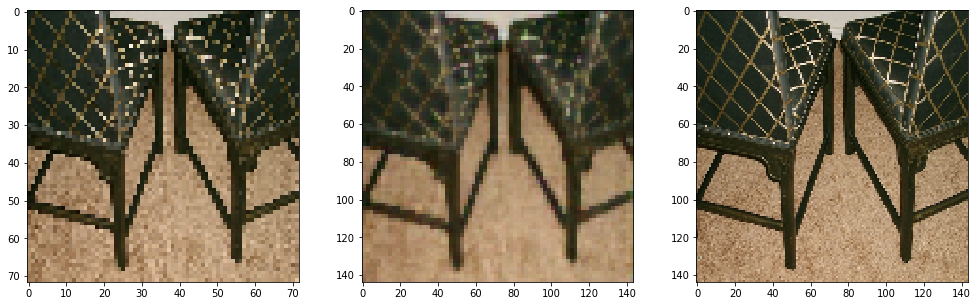

In [36]:
fig, ax= plt.subplots(1,3,figsize=(17,5))
ax[0].imshow(small_test[55])
ax[1].imshow(pred[55])
ax[2].imshow(mid_test[55])

# efficient net based model

In [37]:
!pip install git+https://github.com/titu1994/keras-efficientnets.git

  Cloning https://github.com/titu1994/keras-efficientnets.git to /tmp/pip-req-build-yq3gf_2d
  Running command git clone -q https://github.com/titu1994/keras-efficientnets.git /tmp/pip-req-build-yq3gf_2d
  Created wheel for keras-efficientnets: filename=keras_efficientnets-0.1.7-py2.py3-none-any.whl size=15291 sha256=1ab41a7509aadff45ffd0bbcb1fa06de4bb59d3d3f4e5bf3d066fce7c0427bfe
  Stored in directory: /tmp/pip-ephem-wheel-cache-fbjui25c/wheels/0d/8e/ed/4aed4905c0bd3ff1e480dab2985a1a19b8d9a4a9d225dba818
Successfully built keras-efficientnets


In [38]:
input_shape=images72[0].shape
input_shape

(72, 72, 3)

In [39]:
from keras_efficientnets import EfficientNetB5
inp=Input(images72[0].shape)
eff = EfficientNetB5(input_tensor=inp,  include_top=False, weights='imagenet')
eff.trainable=False




115302400/115295288 [==============================] - 1s 0us/step


In [40]:
eff.summary()

Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           (None, 72, 72, 3)    0                                            
__________________________________________________________________________________________________
conv2d_84 (Conv2D)              (None, 36, 36, 48)   1296        input_28[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 36, 36, 48)   192         conv2d_84[0][0]                  
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 36, 36, 48)   0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [0]:
for i in range(1,537):
  eff.layers.pop()

In [42]:
eff.summary()

Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           (None, 72, 72, 3)    0                                            
__________________________________________________________________________________________________
conv2d_84 (Conv2D)              (None, 36, 36, 48)   1296        input_28[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 36, 36, 48)   192         conv2d_84[0][0]                  
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 36, 36, 48)   0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [0]:
output=UpSampling2D()(eff.layers[-1].output)

In [44]:
conv=Conv2D(filters=144,kernel_size=(3,3),padding='same')(inp)
conv=Activation(LeakyRELU(alpha=0.2))(conv)
x=add([output,conv])
x=Conv2D(filters=64,kernel_size=(1,1),padding='same')(x)
x=Activation(LeakyRELU(alpha=0.2))(x)
x=Conv2D(filters=64,kernel_size=(1,1),padding='same')(x)
x=Activation(LeakyRELU(alpha=0.2))(x)
x=UpSampling2D()(x)
out1=Conv2D(filters=3,kernel_size=(1,1),padding='same')(x)
out1=Activation(LeakyRELU(alpha=0.2))(out1)
x=UpSampling2D()(out1)
out2=Conv2D(filters=3,kernel_size=(1,1),padding='same')(x)
out2=Activation(LeakyRELU(alpha=0.2))(out2)
model=Model(inp,[out1,out2])

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyRELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [45]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "model_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           (None, 72, 72, 3)    0                                            
__________________________________________________________________________________________________
conv2d_84 (Conv2D)              (None, 36, 36, 48)   1296        input_28[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 36, 36, 48)   192         conv2d_84[0][0]                  
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 36, 36, 48)   0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [46]:
model.fit(small_train,[mid_train,big_train],validation_data=(small_valid,[mid_valid,big_valid]),epochs=10)

Train on 4000 samples, validate on 500 samples
Epoch 1/10
4000/4000 [==============================] - 19s 5ms/step - loss: 1.0360 - activation_143_loss: 0.6758 - activation_144_loss: 0.3602 - val_loss: 0.3757 - val_activation_143_loss: 0.1524 - val_activation_144_loss: 0.2233
Epoch 2/10
4000/4000 [==============================] - 14s 3ms/step - loss: 0.1866 - activation_143_loss: 0.0540 - activation_144_loss: 0.1326 - val_loss: 0.1910 - val_activation_143_loss: 0.0506 - val_activation_144_loss: 0.1404
Epoch 3/10
4000/4000 [==============================] - 14s 3ms/step - loss: 0.1326 - activation_143_loss: 0.0270 - activation_144_loss: 0.1056 - val_loss: 0.1242 - val_activation_143_loss: 0.0239 - val_activation_144_loss: 0.1004
Epoch 4/10
4000/4000 [==============================] - 14s 3ms/step - loss: 0.0763 - activation_143_loss: 0.0188 - activation_144_loss: 0.0575 - val_loss: 0.0542 - val_activation_143_loss: 0.0151 - val_activation_144_loss: 0.0391
Epoch 5/10
4000/4000 [=======

In [0]:
pred1,pred2=model.predict(small_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


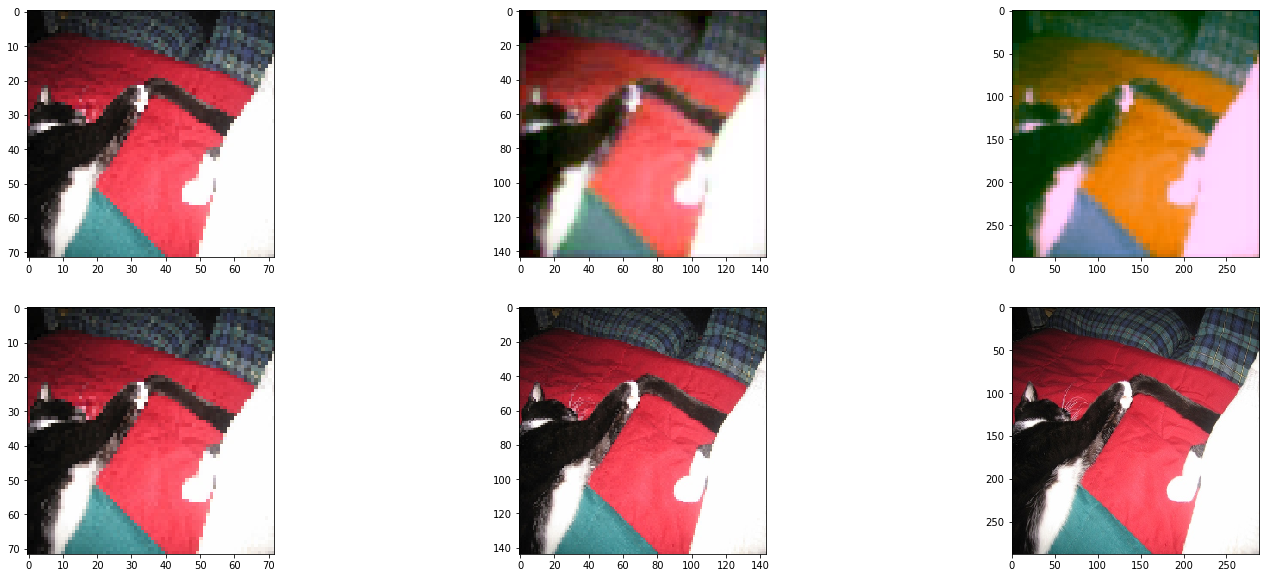

In [48]:
fig, ax= plt.subplots(2,3,figsize=(25,10))
ax[0][0].imshow(small_test[15])
ax[0][1].imshow(pred1[15])
ax[0][2].imshow(pred2[15])
ax[1][0].imshow(small_test[15])
ax[1][1].imshow(mid_test[15])
ax[1][2].imshow(big_test[15])

#dialated blocks based model

In [0]:
def dial_block():
  inp=Input(shape=(None,None,32))
  x1=Conv2D(filters=32,kernel_size=(1,1),dilation_rate=1,padding='same')(inp)
  x1=Activation(LeakyRELU(alpha=0.2))(x1)
  x2=Conv2D(filters=32,kernel_size=(1,1),dilation_rate=2,padding='same')(inp)
  x2=Activation(LeakyRELU(alpha=0.2))(x2)
  x4=Conv2D(filters=32,kernel_size=(1,1),dilation_rate=4,padding='same')(inp)
  x4=Activation(LeakyRELU(alpha=0.2))(x4)
  x=concatenate([x1,x2,x4],axis=3)
  x=Conv2D(filters=32,kernel_size=(1,1),padding='same')(x)
  x=Activation(LeakyRELU(alpha=0.2))(x)
  x=add([x,inp])
  x=Activation(LeakyRELU(alpha=0.2))(x)
  return Model(inp,x)

In [50]:
inp=Input(images72[0].shape)
x=Conv2D(filters=32,activation='relu',kernel_size=(3,3),padding='same')(inp)
x=dial_block()(x)
x=dial_block()(x)
x=UpSampling2D()(x)
out1=Conv2D(filters=3,activation='relu',kernel_size=(1,1),padding='same')(x)
x=dial_block()(x)
x=UpSampling2D()(x)
out2=Conv2D(filters=3,activation='relu',kernel_size=(1,1),padding='same')(x)
model=Model(inp,[out1,out2])

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyRELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [51]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "model_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           (None, 72, 72, 3)    0                                            
__________________________________________________________________________________________________
conv2d_244 (Conv2D)             (None, 72, 72, 32)   896         input_29[0][0]                   
__________________________________________________________________________________________________
model_30 (Model)                multiple             6272        conv2d_244[0][0]                 
__________________________________________________________________________________________________
model_31 (Model)                multiple             6272        model_30[1][0]                   
___________________________________________________________________________________________

In [52]:
model.fit(small_train,[mid_train,big_train],validation_data=(small_valid,[mid_valid,big_valid]),epochs=10)

Train on 4000 samples, validate on 500 samples
Epoch 1/10
4000/4000 [==============================] - 23s 6ms/step - loss: 0.0678 - conv2d_253_loss: 0.0445 - conv2d_258_loss: 0.0233 - val_loss: 0.0176 - val_conv2d_253_loss: 0.0090 - val_conv2d_258_loss: 0.0086
Epoch 2/10
4000/4000 [==============================] - 18s 5ms/step - loss: 0.0160 - conv2d_253_loss: 0.0081 - conv2d_258_loss: 0.0079 - val_loss: 0.0158 - val_conv2d_253_loss: 0.0080 - val_conv2d_258_loss: 0.0078
Epoch 3/10
4000/4000 [==============================] - 18s 5ms/step - loss: 0.0151 - conv2d_253_loss: 0.0076 - conv2d_258_loss: 0.0075 - val_loss: 0.0154 - val_conv2d_253_loss: 0.0077 - val_conv2d_258_loss: 0.0077
Epoch 4/10
4000/4000 [==============================] - 18s 5ms/step - loss: 0.0149 - conv2d_253_loss: 0.0075 - conv2d_258_loss: 0.0074 - val_loss: 0.0152 - val_conv2d_253_loss: 0.0077 - val_conv2d_258_loss: 0.0076
Epoch 5/10
4000/4000 [==============================] - 18s 5ms/step - loss: 0.0148 - conv2d_

In [0]:
pred1,pred2=model.predict(small_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


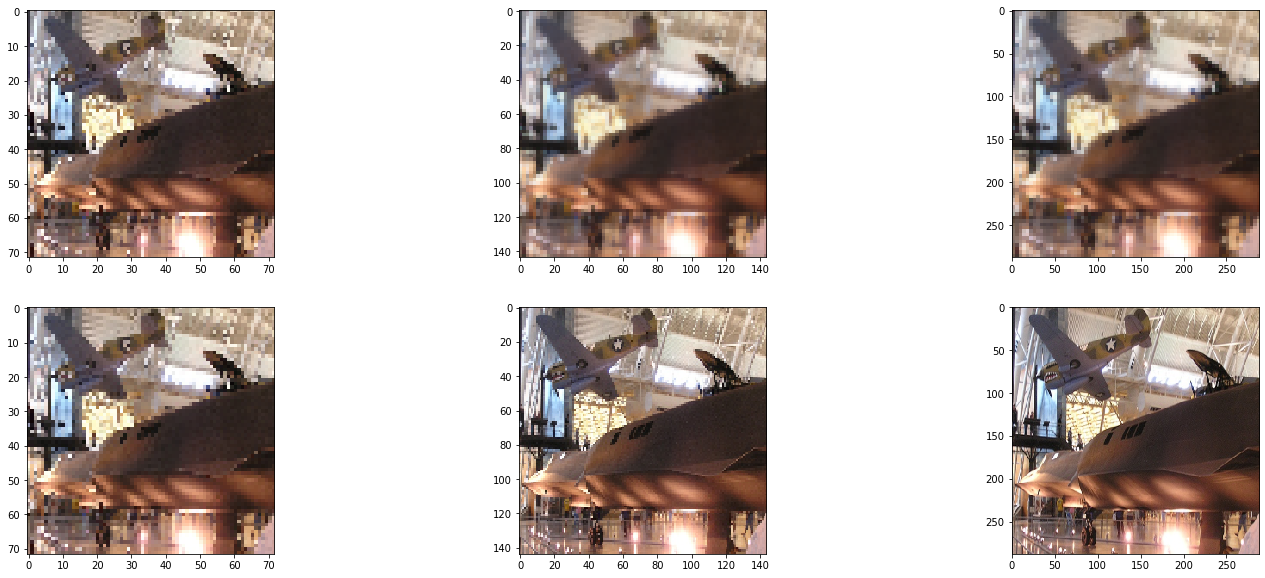

In [54]:
fig, ax= plt.subplots(2,3,figsize=(25,10))
ax[0][0].imshow(small_test[25])
ax[0][1].imshow(pred1[25])
ax[0][2].imshow(pred2[25])
ax[1][0].imshow(small_test[25])
ax[1][1].imshow(mid_test[25])
ax[1][2].imshow(big_test[25])

#depth 2 space based model

In [0]:
import keras.backend as K
import tensorflow as tf

d2s=Lambda(lambda x: tf.depth_to_space(input=x,block_size=2))
def get_depth2_space(scale=2):
  inp=Input(shape=(72,72,3))
  x=Conv2D(32,kernel_size=(3, 3),padding="same")(inp)
  x=Activation(LeakyRELU(alpha=0.2))(x)
  for i in range(1,8):
    x=dial_block()(x)
  x=d2s(x)
  out1=Conv2D(3,kernel_size=(3, 3),padding="same")(x)
  out1=Activation(LeakyRELU(alpha=0.2))(out1)
  x=Conv2D(32,kernel_size=(3, 3),padding="same")(x)
  x=dial_block()(x)
  x=dial_block()(x)
  x=d2s(x)
  out2=Conv2D(3,3,padding="same")(x)
  out2=Activation(LeakyRELU(alpha=0.2))(out2)
  return Model(inp,[out1,out2])

In [56]:
model=get_depth2_space()

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyRELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [57]:
model.compile(optimizer='adam' ,loss='mse')
model.summary()

Model: "model_43"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_33 (InputLayer)           (None, 72, 72, 3)    0                                            
__________________________________________________________________________________________________
conv2d_259 (Conv2D)             (None, 72, 72, 32)   896         input_33[0][0]                   
__________________________________________________________________________________________________
activation_160 (Activation)     (None, 72, 72, 32)   0           conv2d_259[0][0]                 
__________________________________________________________________________________________________
model_34 (Model)                multiple             6272        activation_160[0][0]             
___________________________________________________________________________________________

In [0]:
model.fit(small_train,[mid_train,big_train],validation_data=(small_valid,[mid_valid,big_valid]),epochs=10)

Train on 4000 samples, validate on 500 samples
Epoch 1/10
4000/4000 [==============================] - 38s 9ms/step - loss: 0.0901 - activation_196_loss: 0.0233 - activation_207_loss: 0.0667 - val_loss: 0.0286 - val_activation_196_loss: 0.0127 - val_activation_207_loss: 0.0159
Epoch 2/10
4000/4000 [==============================] - 31s 8ms/step - loss: 0.0237 - activation_196_loss: 0.0106 - activation_207_loss: 0.0131 - val_loss: 0.0213 - val_activation_196_loss: 0.0098 - val_activation_207_loss: 0.0115
Epoch 3/10
4000/4000 [==============================] - 31s 8ms/step - loss: 0.0188 - activation_196_loss: 0.0089 - activation_207_loss: 0.0099 - val_loss: 0.0180 - val_activation_196_loss: 0.0087 - val_activation_207_loss: 0.0094
Epoch 4/10
4000/4000 [==============================] - 31s 8ms/step - loss: 0.0168 - activation_196_loss: 0.0081 - activation_207_loss: 0.0087 - val_loss: 0.0167 - val_activation_196_loss: 0.0081 - val_activation_207_loss: 0.0086
Epoch 5/10
4000/4000 [=======

In [0]:
pred1,pred2=model.predict(small_test)